# Grupo 5 - Sistemas Inteligentes

<b>Nomes:</b> 

<br>

Dimitri Leandro de Oliveira Silva                                            RA: 11201720576

Daniel Vieira Batista                                                              RA: 11106614

Gabriel Fernandes                                                                  RA: 11048816

Yan Podkorytoff Ike Chícharo                                                       RA: 21068214

# KNN

## Configurações Iniciais

Comando para exibir os gráficos gerados no próprio *notebook*.

In [1]:
%matplotlib inline

Pacotes que serão usados para importação do *dataset*, tratamento de vetores, geração de números aleatórios, seleção de *features*, método de classificação, métricas a serem utilizadas e redução de dimensionalidade.

In [2]:
from sklearn import datasets
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.decomposition import PCA
import warnings

In [3]:
random.seed(0)
warnings.filterwarnings('ignore')

#DEFININDO ALGUNS PARÂMETROS PARA PLOTAR GRÁFICOS
%config InlineBackend.figure_format = 'svg'
params = {'figure.figsize': [7, 4], 
          'axes.labelsize': 12,
          'axes.titlesize':16, 
          'font.size': 12,
          'legend.fontsize': 12, 
          'xtick.labelsize': 10, 
          'ytick.labelsize': 10
         }

plt.rcParams.update(params)

## Pré-Processamento dos dados (Olivetti Faces)

Importação do dataset *Olivetti Faces*.

In [4]:
dataset = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/dimi/scikit_learn_data


Atribuição das imagens do *dataset* a variável X e dos elementos *target* a variável y.

In [5]:
X = dataset.images
y = dataset.target

Imprimindo o formato de ambas variáveis geradas.

In [6]:
X.shape

(400, 64, 64)

In [7]:
y.shape

(400,)

Imprimindo uma imagem do *dataset* como exemplo. 

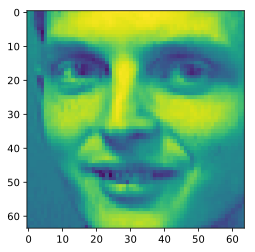

In [8]:
img = plt.imshow(X[399])

Anteriormente percebemos que nossas 400 imagens estão em um formato 64x64 e esse formato não é ideal para classificação, precisamos que nossas imagens tenham um formato unidimensional, para tal faremos um *reshape* no vetor X.

In [9]:
X_reshaped = np.reshape(X, (X.shape[0], X.shape[1] * X.shape[2]))

Observe que agora o nosso novo vetor **X_reshaped** possui imagens em uma única dimensão.

In [10]:
X_reshaped.shape

(400, 4096)

## KNN Implementado pela equipe

A implementação do KNN feita pela equipe está dividida em funções que desempenham as etapas de classificação. Essa divisão é dada da seguinte forma:

- Função de ordenação (OrdenaDistancias): Recebe um vetor distâncias e o ordena.

- Cálculo de distâncias (CalculoDistancia): Calcula a distância entre dois vetores utilizando a distância de Minkowski.

- Implementação KNN (KNN_Ajuste_Predicao): Faz a predição dos dados utilizando a função de ordenação e o cálculo de distâncias.

- Função de ordenação:

In [11]:
def OrdenaDistancias(distancias, coluna=1):
    return sorted(distancias, key=lambda coluna: coluna[1])

- Cálculo das distâncias:

In [12]:
def CalculoDistancia(vetor1, vetor2, p=2):
    
    vector1 = np.array(vetor1)
    vector2 = np.array(vetor2)

    diferenca = vector2 - vector1
    
    dif_abs = np.abs(diferenca)
    
    distancia = (np.sum(diferenca**p))**(1/p)
    
    return distancia

- Implementação KNN:

In [13]:
def KNN_Ajuste_Predicao(X,Y,X_teste,k=5,p=2):
    
    predicao = []

    for i,ponto_teste in enumerate(X_teste):
    
        lista_distancias = []
    
        for j,ponto_treino in enumerate(X):

            distancia = CalculoDistancia(ponto_treino,ponto_teste,p=p)
        
            lista_distancias.append([j, distancia, Y[j]])
            
        vizinhos = OrdenaDistancias(lista_distancias)[:k]
        
        contagem = np.unique(np.array(vizinhos)[:,2], return_counts=True)
        
        moda = np.max(np.array(contagem),axis=1) 
        
        predicao.append(moda[0])
    
    return np.array(predicao)

## KNN com a base de dados Olivetti Faces

Abaixo temos a execução de ambos algoritmos com a base de dados "*Olivetti Faces*", implementado pelo Sklearn e implementado por nossa equipe de forma que guardamos em um vetor cada métrica que será analisada futuramente.

Obs.: O grupo decidiu manter o código comentado abaixo de forma que o leitor possa acompanhar o sentido de cada módulo do código, dado que desempenha função citada acima.

In [14]:
# Quantidade de pacotes para o KFold
qtdPacotesKFold = 10

#Instanciando um objeto KNN
knn = KNeighborsClassifier(n_neighbors = 3, algorithm='brute', weights='uniform')

#Instânciando um objeto KFold com 10 pacotes
objKFold = KFold(n_splits = qtdPacotesKFold, shuffle=True)

#Vetores de métricas para o algoritmo implementado
vetorAcuraciasImplementado = []
vetorF1Implementado = []
vetorPrecisaoImplementado = []
vetorRecallImplementado = []
# Vetor de metricas para o Sklearn
vetorAcuraciasSklearn = []
vetorF1Sklearn = []
vetorPrecisaoSklearn = []
vetorRecallSklearn = []
#Rodando o Perceptron com o KFold
i = 0
for trainIndex, testIndex in objKFold.split(X_reshaped):
    
    # Separando os dados de treinamento e teste
    i += 1
    xTrain, xTest, yTrain, yTest = X_reshaped[trainIndex], X_reshaped[testIndex], y[trainIndex], y[testIndex]
    
    #Predizendo os dados de teste
    Pred_Implementa = KNN_Ajuste_Predicao(xTrain, yTrain, xTest, k=3, p=2)
    
    # Treinando o classificador
    knn = knn.fit(xTrain, yTrain)
    
    # Predizendo os dados de teste
    yPredSklearn = knn.predict(xTest)
    
    
    # Verificando metricas no Sklearn
    vetorAcuraciasSklearn.append(accuracy_score(yTest, yPredSklearn))
    vetorF1Sklearn.append(f1_score(yTest, yPredSklearn, average='macro'))
    vetorPrecisaoSklearn.append(precision_score(yTest, yPredSklearn, average='macro'))
    vetorRecallSklearn.append(recall_score(yTest, yPredSklearn, average='macro'))
    
    # Verificando métricas no algoritmo implementado
    vetorAcuraciasImplementado.append(accuracy_score(yTest, Pred_Implementa))
    vetorF1Implementado.append(f1_score(yTest, Pred_Implementa, average='macro'))
    vetorPrecisaoImplementado.append(precision_score(yTest, Pred_Implementa, average='macro'))
    vetorRecallImplementado.append(recall_score(yTest, Pred_Implementa, average='macro'))
    
    
    print("Iteração", i, "finalizada")

Iteração 1 finalizada
Iteração 2 finalizada
Iteração 3 finalizada
Iteração 4 finalizada
Iteração 5 finalizada
Iteração 6 finalizada
Iteração 7 finalizada
Iteração 8 finalizada
Iteração 9 finalizada
Iteração 10 finalizada


# Analisando as Métricas

E em seguida utilizaremos as métricas calculadas para fazer as comparações entre nossas implementações e as implementações realizada pelo Sklearn.

## Acurácia

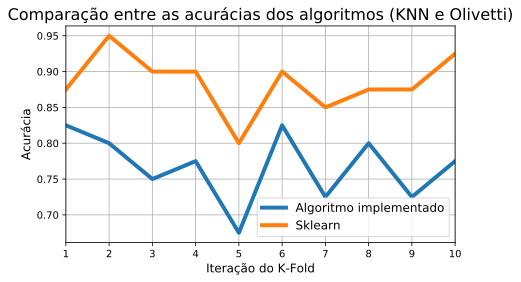

Acurácia média do algoritmo implementado: 0.7675
Acurácia média do KNN do Sklearn: 0.8850000000000001


In [15]:
plt.plot(range(1, qtdPacotesKFold + 1), vetorAcuraciasImplementado, linewidth=4, label="Algoritmo implementado")
plt.plot(range(1, qtdPacotesKFold + 1), vetorAcuraciasSklearn, linewidth=4, label="Sklearn")
plt.title("Comparação entre as acurácias dos algoritmos (KNN e Olivetti)")
plt.xlabel("Iteração do K-Fold")
plt.ylabel("Acurácia")
plt.xlim(1,qtdPacotesKFold)
plt.grid()
plt.legend()
plt.savefig('comparacaoKNNAcuracia.eps', format='eps', bbox_inches='tight')
plt.show()

print("Acurácia média do algoritmo implementado:", np.mean(vetorAcuraciasImplementado))
print("Acurácia média do KNN do Sklearn:", np.mean(vetorAcuraciasSklearn))

## F1 Score

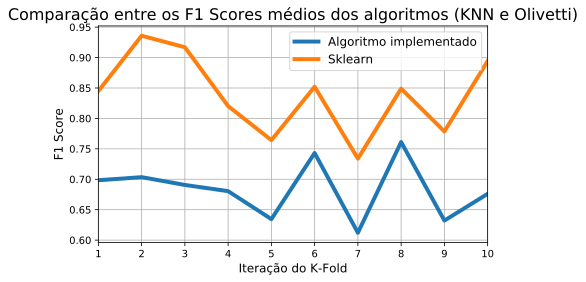

Média do F1 score médio do algoritmo implementado: 0.683189761583165
Média do F1 score médio do KNN do Sklearn: 0.8389874210476016


In [16]:
plt.plot(range(1, qtdPacotesKFold + 1), vetorF1Implementado, linewidth=4, label="Algoritmo implementado")
plt.plot(range(1, qtdPacotesKFold + 1), vetorF1Sklearn, linewidth=4, label="Sklearn")
plt.title("Comparação entre os F1 Scores médios dos algoritmos (KNN e Olivetti)")
plt.xlabel("Iteração do K-Fold")
plt.ylabel("F1 Score")
plt.xlim(1,qtdPacotesKFold)
plt.grid()
plt.legend()
plt.savefig('comparacaoKNNF1Score.eps', format='eps', bbox_inches='tight')
plt.show()

print("Média do F1 score médio do algoritmo implementado:", np.mean(vetorF1Implementado))
print("Média do F1 score médio do KNN do Sklearn:", np.mean(vetorF1Sklearn))

## Precisão

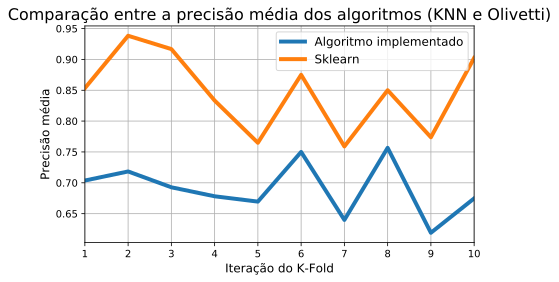

Média da precisão média do algoritmo implementado: 0.6902830411950961
Média da precisão média do KNN do Sklearn: 0.8466522836465364


In [17]:
plt.plot(range(1, qtdPacotesKFold + 1), vetorPrecisaoImplementado, linewidth=4, label="Algoritmo implementado")
plt.plot(range(1, qtdPacotesKFold + 1), vetorPrecisaoSklearn, linewidth=4, label="Sklearn")
plt.title("Comparação entre a precisão média dos algoritmos (KNN e Olivetti)")
plt.xlabel("Iteração do K-Fold")
plt.ylabel("Precisão média")
plt.xlim(1,qtdPacotesKFold)
plt.grid()
plt.legend()
plt.savefig('comparacaoKNNPrecisao.eps', format='eps', bbox_inches='tight')
plt.show()

print("Média da precisão média do algoritmo implementado:", np.mean(vetorPrecisaoImplementado))
print("Média da precisão média do KNN do Sklearn:", np.mean(vetorPrecisaoSklearn))

## Recall

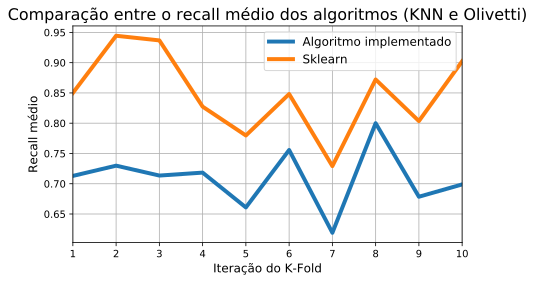

Média do recall médio do algoritmo implementado: 0.7087990937167106
Média do recall médio do KNN do Sklearn: 0.8493842364532019


In [18]:
plt.plot(range(1, qtdPacotesKFold + 1), vetorRecallImplementado, linewidth=4, label="Algoritmo implementado")
plt.plot(range(1, qtdPacotesKFold + 1), vetorRecallSklearn, linewidth=4, label="Sklearn")
plt.title("Comparação entre o recall médio dos algoritmos (KNN e Olivetti)")
plt.xlabel("Iteração do K-Fold")
plt.ylabel("Recall médio")
plt.xlim(1,qtdPacotesKFold)
plt.grid()
plt.legend()
plt.savefig('comparacaoKNNRecall.eps', format='eps', bbox_inches='tight')
plt.show()


print("Média do recall médio do algoritmo implementado:", np.mean(vetorRecallImplementado))
print("Média do recall médio do KNN do Sklearn:", np.mean(vetorRecallSklearn))

## Pré-Processamento dos dados (Olivetti Faces)

Como análise alternativa do nosso modelo, utilizaremos um dataset de menor dimensionalidade de dados e esperamos obter melhores resultados.

In [19]:
dataset_iris = datasets.load_iris()

Atribuição das imagens do dataset a variável X_iris e dos elementos target a variável y_iris.

In [20]:
X_iris = dataset_iris.data
y_iris = dataset_iris.target

## KNN com a base de dados Iris

Abaixo temos a execução de ambos algoritmos com a base de dados "*Iris*", implementado pelo Sklearn e implementado por nossa equipe de forma que guardamos em um vetor cada métrica que será analisada futuramente.

Obs.: O grupo decidiu manter o código comentado abaixo de forma que o leitor possa acompanhar o sentido de cada módulo do código, dado que desempenha a classificação baseada nos métodos implementados.

In [21]:
# Quantidade de pacotes para o KFold
qtdPacotesKFold = 10

#Instânciando um objeto KNN
knn_iris = KNeighborsClassifier(n_neighbors = 3, algorithm='brute', weights='uniform')

#Instânciando um objeto KFold com 10 pacotes
objKFold = KFold(n_splits = qtdPacotesKFold, shuffle=True)

#Vetores de métricas para o algoritmo implementado
vetorAcuraciasImplementado = []
vetorF1Implementado = []
vetorPrecisaoImplementado = []
vetorRecallImplementado = []
# Vetor de metricas para o Sklearn
vetorAcuraciasSklearn = []
vetorF1Sklearn = []
vetorPrecisaoSklearn = []
vetorRecallSklearn = []
#Rodando o Perceptron com o KFold
i = 0
for trainIndex, testIndex in objKFold.split(X_iris):
    
    # Separando os dados de treinamento e teste
    i += 1
    xTrain, xTest, yTrain, yTest = X_iris[trainIndex], X_iris[testIndex], y_iris[trainIndex], y_iris[testIndex]
    
    #Predizendo os dados de teste
    Pred_Implementa = KNN_Ajuste_Predicao(xTrain, yTrain, xTest, k=3, p=2)
    
    # Treinando o classificador
    knn_iris.fit(xTrain, yTrain)
    
    # Predizendo os dados de teste
    yPredSklearn = knn_iris.predict(xTest)
    
    # Verificando metricas no Sklearn
    vetorAcuraciasSklearn.append(accuracy_score(yTest, yPredSklearn))
    vetorF1Sklearn.append(f1_score(yTest, yPredSklearn, average='macro'))
    vetorPrecisaoSklearn.append(precision_score(yTest, yPredSklearn, average='macro'))
    vetorRecallSklearn.append(recall_score(yTest, yPredSklearn, average='macro'))   
    
    # Verificando métricas no algoritmo implementado
    vetorAcuraciasImplementado.append(accuracy_score(yTest, Pred_Implementa))
    vetorF1Implementado.append(f1_score(yTest, Pred_Implementa, average='macro'))
    vetorPrecisaoImplementado.append(precision_score(yTest, Pred_Implementa, average='macro'))
    vetorRecallImplementado.append(recall_score(yTest, Pred_Implementa, average='macro'))
    
    
    print("Iteração", i, "finalizada")

Iteração 1 finalizada
Iteração 2 finalizada
Iteração 3 finalizada
Iteração 4 finalizada
Iteração 5 finalizada
Iteração 6 finalizada
Iteração 7 finalizada
Iteração 8 finalizada
Iteração 9 finalizada
Iteração 10 finalizada


## Analisando as métricas

Com as métricas calculadas na seção anterior iremos plotar a média das métricas em ambas implementações de modo a comparar o desempenho obtido.

## Acurácia

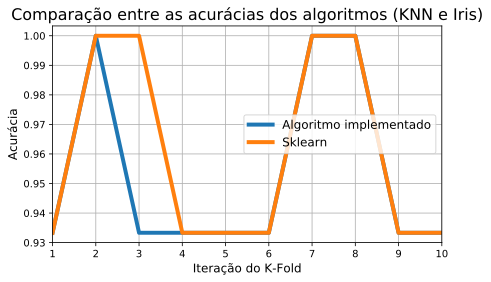

Acurácia média do algoritmo implementado: 0.9533333333333334
Acurácia média do KNN do Sklearn: 0.96


In [22]:
plt.plot(range(1, qtdPacotesKFold + 1), vetorAcuraciasImplementado, linewidth=4, label="Algoritmo implementado")
plt.plot(range(1, qtdPacotesKFold + 1), vetorAcuraciasSklearn, linewidth=4, label="Sklearn")
plt.title("Comparação entre as acurácias dos algoritmos (KNN e Iris)")
plt.xlabel("Iteração do K-Fold")
plt.ylabel("Acurácia")
plt.xlim(1,qtdPacotesKFold)
plt.grid()
plt.legend()
plt.savefig('comparacaoKNNAcuraciaIris.eps', format='eps', bbox_inches='tight')
plt.show()

print("Acurácia média do algoritmo implementado:", np.mean(vetorAcuraciasImplementado))
print("Acurácia média do KNN do Sklearn:", np.mean(vetorAcuraciasSklearn))

## F1 Score

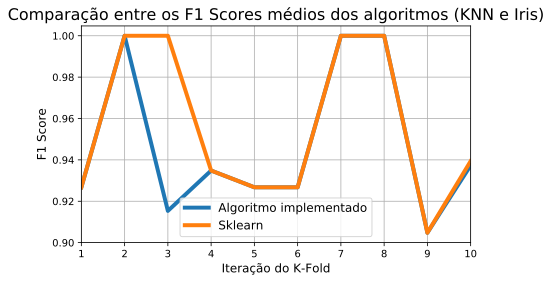

Média do F1 score médio do algoritmo implementado: 0.9472484630379366
Média do F1 score médio do KNN do Sklearn: 0.9559212717107453


In [23]:
plt.plot(range(1, qtdPacotesKFold + 1), vetorF1Implementado, linewidth=4, label="Algoritmo implementado")
plt.plot(range(1, qtdPacotesKFold + 1), vetorF1Sklearn, linewidth=4, label="Sklearn")
plt.title("Comparação entre os F1 Scores médios dos algoritmos (KNN e Iris)")
plt.xlabel("Iteração do K-Fold")
plt.ylabel("F1 Score")
plt.xlim(1,qtdPacotesKFold)
plt.grid()
plt.legend()
plt.savefig('comparacaoKNNF1ScoreIris.eps', format='eps', bbox_inches='tight')
plt.show()

print("Média do F1 score médio do algoritmo implementado:", np.mean(vetorF1Implementado))
print("Média do F1 score médio do KNN do Sklearn:", np.mean(vetorF1Sklearn))

## Precisão

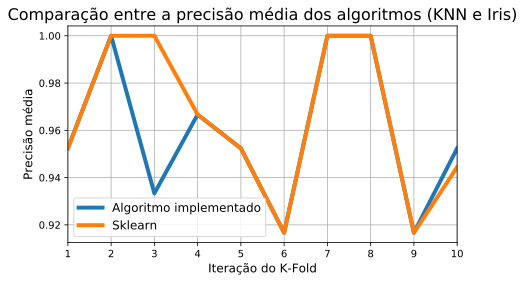

Média da precisão média do algoritmo implementado: 0.959047619047619
Média da precisão média do KNN do Sklearn: 0.9649206349206348


In [24]:
plt.plot(range(1, qtdPacotesKFold + 1), vetorPrecisaoImplementado, linewidth=4, label="Algoritmo implementado")
plt.plot(range(1, qtdPacotesKFold + 1), vetorPrecisaoSklearn, linewidth=4, label="Sklearn")
plt.title("Comparação entre a precisão média dos algoritmos (KNN e Iris)")
plt.xlabel("Iteração do K-Fold")
plt.ylabel("Precisão média")
plt.xlim(1,qtdPacotesKFold)
plt.grid()
plt.legend()
plt.savefig('comparacaoKNNPrecisaoIris.eps', format='eps', bbox_inches='tight')
plt.show()

print("Média da precisão média do algoritmo implementado:", np.mean(vetorPrecisaoImplementado))
print("Média da precisão média do KNN do Sklearn:", np.mean(vetorPrecisaoSklearn))

## Recall

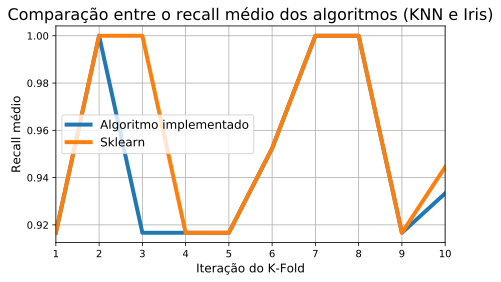

Média do recall médio do algoritmo implementado: 0.9469047619047618
Média do recall médio do KNN do Sklearn: 0.9563492063492063


In [25]:
plt.plot(range(1, qtdPacotesKFold + 1), vetorRecallImplementado, linewidth=4, label="Algoritmo implementado")
plt.plot(range(1, qtdPacotesKFold + 1), vetorRecallSklearn, linewidth=4, label="Sklearn")
plt.title("Comparação entre o recall médio dos algoritmos (KNN e Iris)")
plt.xlabel("Iteração do K-Fold")
plt.ylabel("Recall médio")
plt.xlim(1,qtdPacotesKFold)
plt.grid()
plt.legend()
plt.savefig('comparacaoKNNRecallIris.eps', format='eps', bbox_inches='tight')
plt.show()


print("Média do recall médio do algoritmo implementado:", np.mean(vetorRecallImplementado))
print("Média do recall médio do KNN do Sklearn:", np.mean(vetorRecallSklearn))